<a href="https://colab.research.google.com/github/EthanDuog/Predictive-modeling/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Data Preparation*
Below are some suggestions to explore and understand datasets:
* Look at the attribute type; e.g., nominal, ordinal or quantitative. 
* Find any missing values. 
* Find max, min, mean and standard deviation of attributes. 
* Determine any outlier values (records) for each of the attributes or attributes under consideration (min, max, std. dev, scatter plots, box plots or others can be used).
* Which attributes seem to be correlated? Which attributes seem to be most linked to the class attribute?.
* Determine whether you need to handle missing values or transform any attributes (e.g., by normalizing the attributes, discretizing numeric attributes to categorical attributes, etc.). 
* Which attributes do you think can be eliminated or included in the analysis? This can be a subjective decision or an objective decision based on a statistical method. 
* Determine whether the dataset has an imbalanced class distribution (same
proportion of records of different types or not) and do you need to balance the
dataset.
* Analyze the distribution of numeric attributes (normal or other). Plot histograms for attributes of concern and analyze whether they have any influence on the class attribute. 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# View the customer churn dataset as df
df = pd.read_csv('churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [ ]:
allData = pd.read_csv("churn.csv")
allData

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [ ]:
allData.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

# One hot coding for categorical attribute
Assign categorical value to a number for further data processing task

In [ ]:
allData['Inter_Plan_val'] = allData['Int\'l Plan']
allData['VMail_Plan_val'] = allData['VMail Plan']
allData['Churn_val'] = allData['Churn?']

# manually assing 1/0 to Yes/No
# note that we use a different method than LAB 4
allData['Inter_Plan_val'] = allData['Inter_Plan_val'].map({'yes': 1, 'no': 0})
allData['VMail_Plan_val'] = allData['VMail_Plan_val'].map({'yes': 1, 'no': 0})
allData['Churn_val'] = allData['Churn_val'].map({'True.': 1, 'False.': 0})
allData

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Inter_Plan_val,VMail_Plan_val,Churn_val
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False.,0,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False.,0,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False.,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False.,1,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False.,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,83,12.56,9.9,6,2.67,2,False.,0,1,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,123,8.61,9.6,4,2.59,3,False.,0,0,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,91,8.64,14.1,6,3.81,2,False.,0,0,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,137,6.26,5.0,10,1.35,2,False.,1,0,0


# Attribute Correlations
the higher the value the more connection between attributes 

In [ ]:
df = pd.DataFrame(allData)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


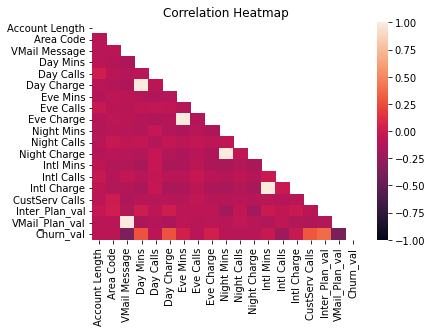

In [ ]:
heatmap = sns.heatmap(corr_matrix.corr(), mask =mask,vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap',);

Correlated attributes: 
Vmail Message and Vmail_Plan_val

* Vmail Message and Vmail_Plan_val
* Intl Mins and Intl Charge
* Night Mins and Night Charge
* Eve Mins and Eve Charge
* Day Mins and Day Charge 




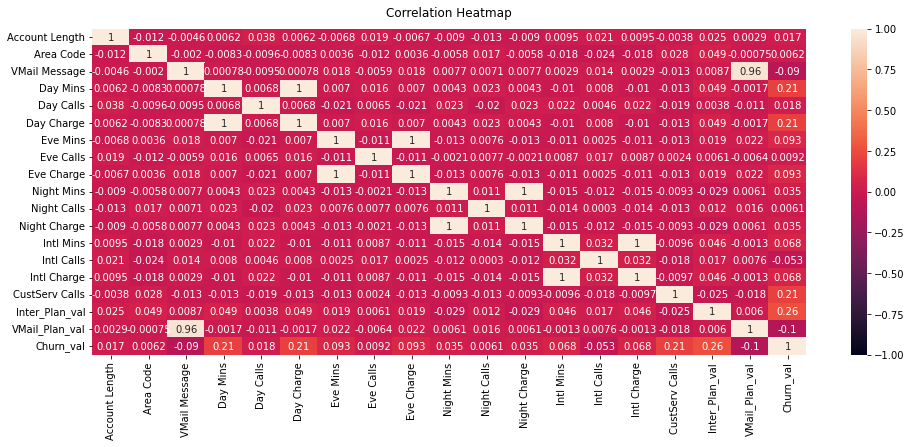

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# MIN, MAX, MEAN, STANDARD DEVIATION
numerical data columns only



In [ ]:
allData.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
Inter_Plan_val      int64
VMail_Plan_val      int64
Churn_val           int64
dtype: object

calculate min, max, mean, standard deviation for numerical attributes

In [ ]:
numerical_stribute_list= ["VMail Message","Day Mins","Day Calls","Day Charge","Eve Mins","Eve Calls","Eve Charge","Night Mins","Night Calls","Night Charge","Intl Mins","Intl Calls","Intl Charge","CustServ Calls"]

In [ ]:
for attributes in numerical_stribute_list:
  print("min value for column",attributes, "is: ", min(allData[attributes]))

min value for column VMail Message is:  0
min value for column Day Mins is:  0.0
min value for column Day Calls is:  0
min value for column Day Charge is:  0.0
min value for column Eve Mins is:  0.0
min value for column Eve Calls is:  0
min value for column Eve Charge is:  0.0
min value for column Night Mins is:  23.2
min value for column Night Calls is:  33
min value for column Night Charge is:  1.04
min value for column Intl Mins is:  0.0
min value for column Intl Calls is:  0
min value for column Intl Charge is:  0.0
min value for column CustServ Calls is:  0


In [ ]:
for attributes in numerical_stribute_list:
  print("max value for column",attributes, "is: ", max(allData[attributes]))


max value for column VMail Message is:  51
max value for column Day Mins is:  350.8
max value for column Day Calls is:  165
max value for column Day Charge is:  59.64
max value for column Eve Mins is:  363.7
max value for column Eve Calls is:  170
max value for column Eve Charge is:  30.91
max value for column Night Mins is:  395.0
max value for column Night Calls is:  175
max value for column Night Charge is:  17.77
max value for column Intl Mins is:  20.0
max value for column Intl Calls is:  20
max value for column Intl Charge is:  5.4
max value for column CustServ Calls is:  9


In [ ]:
from numpy.ma.extras import average
for attributes in numerical_stribute_list:
  print("mean value for column",attributes, "is: ", round(average(allData[attributes]),2))

mean value for column VMail Message is:  8.1
mean value for column Day Mins is:  179.78
mean value for column Day Calls is:  100.44
mean value for column Day Charge is:  30.56
mean value for column Eve Mins is:  200.98
mean value for column Eve Calls is:  100.11
mean value for column Eve Charge is:  17.08
mean value for column Night Mins is:  200.87
mean value for column Night Calls is:  100.11
mean value for column Night Charge is:  9.04
mean value for column Intl Mins is:  10.24
mean value for column Intl Calls is:  4.48
mean value for column Intl Charge is:  2.76
mean value for column CustServ Calls is:  1.56


In [ ]:
import statistics
for attributes in numerical_stribute_list:
  print("standard deviation value for column",attributes, "is: ", round(statistics.stdev(allData[attributes]),2))

standard deviation value for column VMail Message is:  13.69
standard deviation value for column Day Mins is:  54.47
standard deviation value for column Day Calls is:  20.07
standard deviation value for column Day Charge is:  9.26
standard deviation value for column Eve Mins is:  50.71
standard deviation value for column Eve Calls is:  19.92
standard deviation value for column Eve Charge is:  4.31
standard deviation value for column Night Mins is:  50.57
standard deviation value for column Night Calls is:  19.57
standard deviation value for column Night Charge is:  2.28
standard deviation value for column Intl Mins is:  2.79
standard deviation value for column Intl Calls is:  2.46
standard deviation value for column Intl Charge is:  0.75
standard deviation value for column CustServ Calls is:  1.32


# Outliner

Box Plot for:  VMail Message


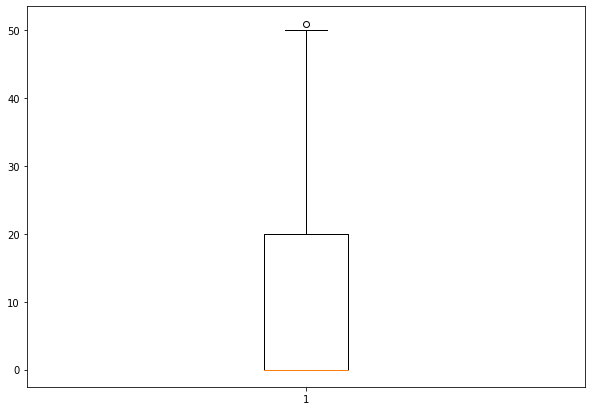

Box Plot for:  Day Mins


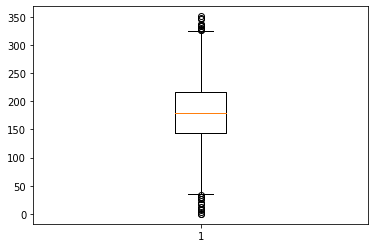

Box Plot for:  Day Calls


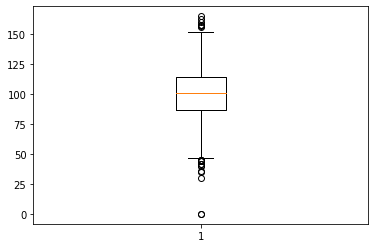

Box Plot for:  Day Charge


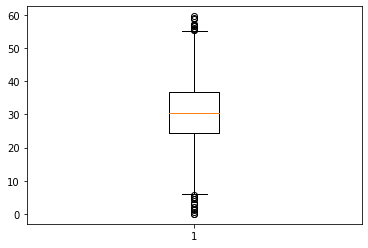

Box Plot for:  Eve Mins


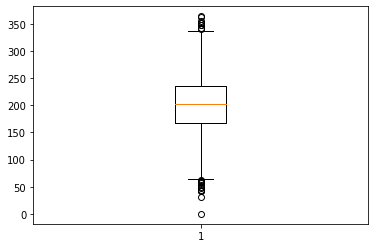

Box Plot for:  Eve Calls


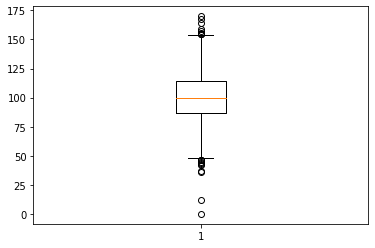

Box Plot for:  Eve Charge


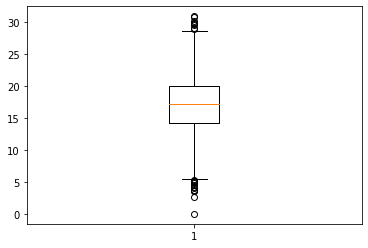

Box Plot for:  Night Mins


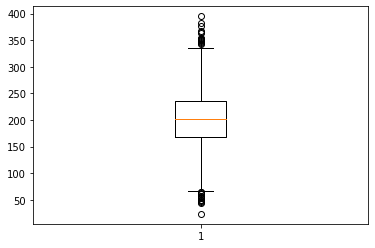

Box Plot for:  Night Calls


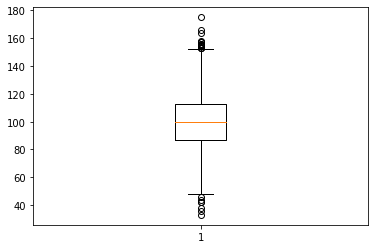

Box Plot for:  Night Charge


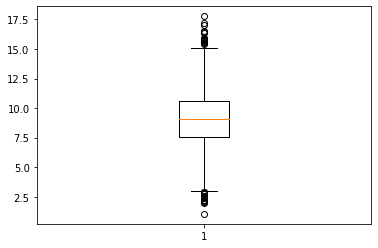

Box Plot for:  Intl Mins


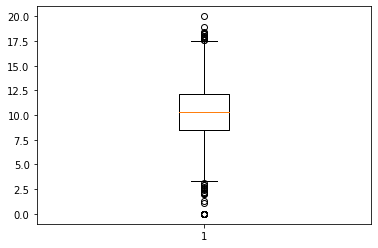

Box Plot for:  Intl Calls


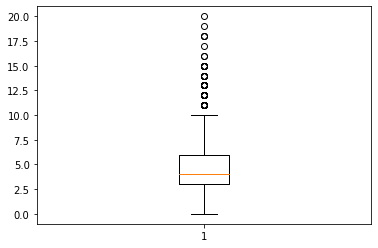

Box Plot for:  Intl Charge


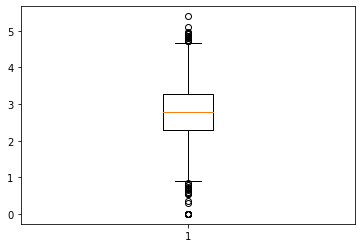

Box Plot for:  CustServ Calls


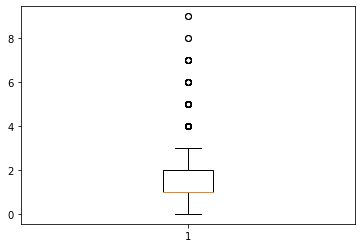

In [ ]:

fig = plt.figure(figsize =(10,7))

for attributes in numerical_stribute_list:
  print("Box Plot for: ", attributes)
  plt.boxplot(allData[attributes])
  plt.show()


In [ ]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:

for attributes in numerical_stribute_list:
  outliers=[]
  outlier_datapoints = detect_outlier(allData[attributes])
  print("Outlier for: ", attributes, "(",len(outliers),"outliers)",outlier_datapoints)

  print("")

Outlier for:  VMail Message ( 3 outliers) [51, 50, 50]

Outlier for:  Day Mins ( 9 outliers) [350.8, 346.8, 12.5, 0.0, 0.0, 7.9, 345.3, 2.6, 7.8]

Outlier for:  Day Calls ( 9 outliers) [163, 36, 40, 165, 30, 0, 0, 35, 40]

Outlier for:  Day Charge ( 9 outliers) [59.64, 58.96, 2.13, 0.0, 0.0, 1.34, 58.7, 0.44, 1.33]

Outlier for:  Eve Mins ( 9 outliers) [31.2, 42.2, 43.9, 42.5, 48.1, 361.8, 354.2, 363.7, 0.0]

Outlier for:  Eve Calls ( 7 outliers) [164, 168, 37, 12, 36, 0, 170]

Outlier for:  Eve Charge ( 9 outliers) [2.65, 3.59, 3.73, 3.61, 4.09, 30.75, 30.11, 30.91, 0.0]

Outlier for:  Night Mins ( 11 outliers) [354.9, 45.0, 364.3, 43.7, 23.2, 381.9, 377.5, 367.7, 395.0, 364.9, 47.4]

Outlier for:  Night Calls ( 6 outliers) [175, 166, 33, 38, 36, 164]

Outlier for:  Night Charge ( 11 outliers) [15.97, 2.03, 16.39, 1.97, 1.04, 17.19, 16.99, 16.55, 17.77, 16.42, 2.13]

Outlier for:  Intl Mins ( 22 outliers) [20.0, 0.0, 18.9, 0.0, 0.0, 0.0, 0.0, 1.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

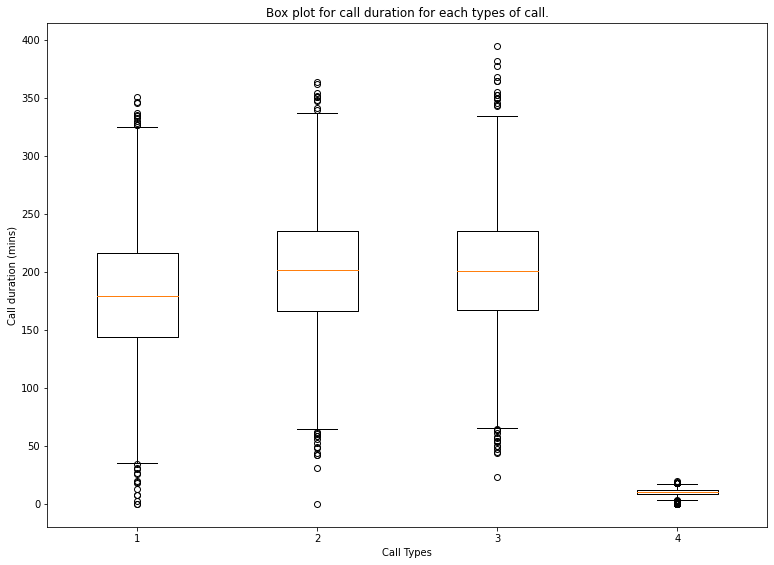

In [ ]:
data_1 = allData['Day Mins']
data_2 = allData['Eve Mins']
data_3 = allData['Night Mins']
data_4 = allData['Intl Mins']

data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

plt.title('Box plot for call duration for each types of call.')
plt.xlabel('Call Types')
plt.ylabel('Call duration (mins)')

# show plot
plt.show()

# Most frequent value for categorical data column

In [ ]:
def most_frequent(List):
    return max(set(List), key = List.count)
 
categorical_list = ["State","Account Length","Area Code", "Int'l Plan","VMail Plan","Churn?"]
for categorical_attributes in categorical_list:
  list1 = list(allData[categorical_attributes])
  print( "Most frequent value for column",categorical_attributes,"is: " , most_frequent(list1))

Most frequent value for column State is:  WV
Most frequent value for column Account Length is:  105
Most frequent value for column Area Code is:  415
Most frequent value for column Int'l Plan is:  no
Most frequent value for column VMail Plan is:  no
Most frequent value for column Churn? is:  False.


There is no blank (missing value

In [ ]:
allData.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
Inter_Plan_val    0
VMail_Plan_val    0
Churn_val         0
dtype: int64

Histogram

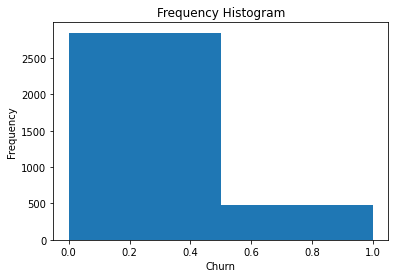

In [ ]:
x = allData['Churn_val']
plt.hist(x,bins=2)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel = 'Churn');

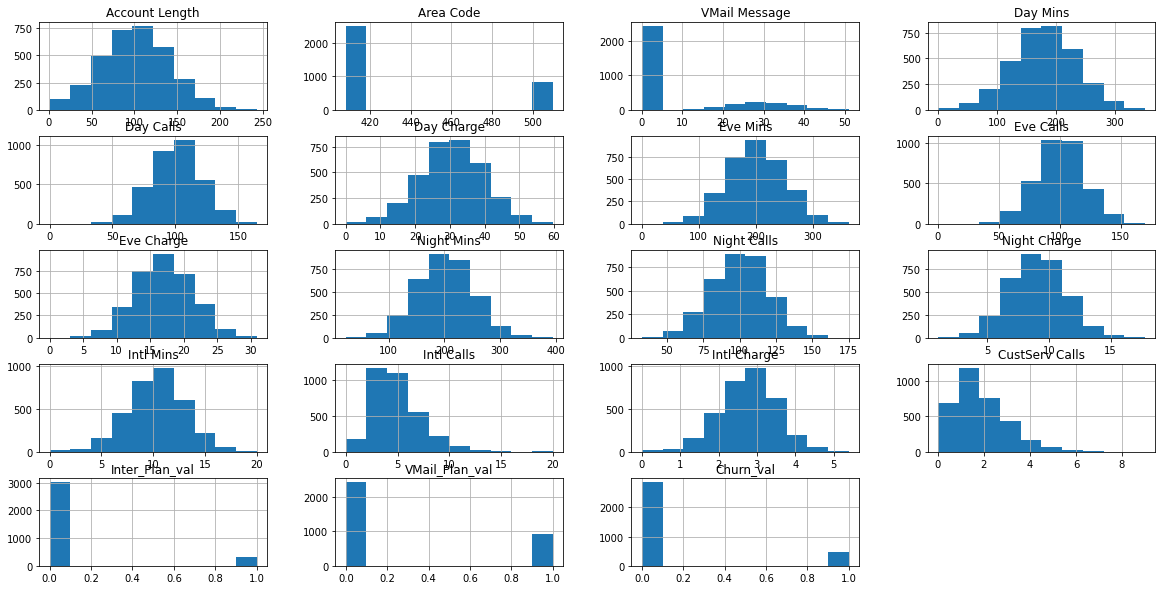

In [ ]:
# Create 
df.hist(figsize=(20,10))
plt.show()

**Split Data Set into Train and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(allData, test_size=0.2)

**Create Correlation heatmaps for Train and Test **

**Train Data Set Heatmap**

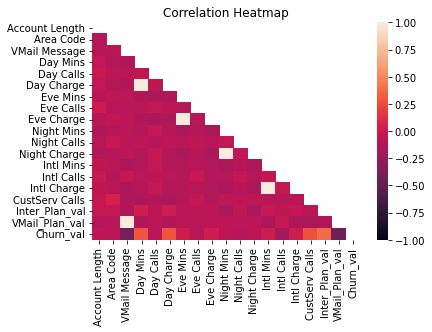

In [ ]:
df = pd.DataFrame(train)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(corr_matrix.corr(), mask =mask,vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap',);

**Test Data Set Heatmap**

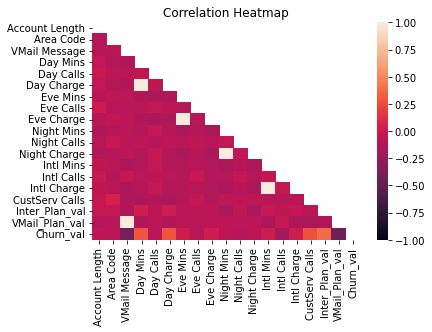

In [ ]:
df = pd.DataFrame(train)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(corr_matrix.corr(), mask =mask,vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap',);

In [ ]:
#Let's create a list for our categorical columns
# for Churn data set
cat_cols = ["State", "Area Code", "Phone", "Int'l Plan", "VMail Plan"]

In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot = df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns = cat_cols, prefix = cat_cols)
#print the dataset
df_onehot

In [ ]:
# The train test set split
from sklearn.model_selection import train_test_split

class_col_name="Churn?"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=1) # 70% training and 30% test

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
print("Successfuly trained the decision tree...")

In [ ]:
y_pred = clf.predict(X_test) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

In [ ]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for Churn dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      False.       1.00      1.00      1.00       675
       True.       1.00      1.00      1.00       125

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

